In [1]:
from scipy.io.wavfile import read 
import numpy as np
import moviepy.editor as mp
from moviepy.video.io.VideoFileClip import VideoFileClip
import os


#ffmpeg -i "Cutting Crew - (I Just) Died In Your Arms (Official Music Video).mp3" -sample_fmt s16 output.wav

def get_time_of_max_volume(wav_file: str):
    samplerate, data = read(wav_file)
    #only needed for 2 channel audio data
    data_flatten = data.flatten()
    index_max = np.argmax(data_flatten)
    time_max = index_max/samplerate
    return time_max

def get_duration(wav_file: str):
    samplerate, data = read(wav_file)
    return len(data)/samplerate

def get_data(wav_file: str):
    samplerate, data = read(wav_file)
    return data

def get_samplerate(wav_file: str):
    samplerate, data = read(wav_file)
    return samplerate

def get_time_vector(wav_file: str, duration, samplerate):
    time_vector = np.arange(0,duration,1/samplerate) #time vector
    return time_vector

def extract_subclip_from_video(mp4_file_name: str):
    clip = mp.VideoFileClip(mp4_file_name + ".mp4")
    clip.audio.write_audiofile(mp4_file_name + ".wav")

    time_max_volume = get_time_of_max_volume(mp4_file_name + ".wav")
    duration = get_duration(mp4_file_name + ".wav")

    if time_max_volume < 15:
        with VideoFileClip(mp4_file_name + ".mp4") as video:
            new = video.subclip(time_max_volume, time_max_volume + 60)
            new.write_videofile(mp4_file_name + "_cut.mp4", audio_codec='aac')
    else:
        print("The time of the maximum volume in the video is higher than 15 seconds, so the video was not cut")
        
    if os.path.exists(mp4_file_name + ".wav"):
        os.remove(mp4_file_name + ".wav")
    else:
        print("The file does not exist")



In [2]:
extract_subclip_from_video("assets/Gehen-6,5-seite")

chunk:   2%|▏         | 24/1520 [00:00<00:06, 239.05it/s, now=None]

MoviePy - Writing audio in assets/Gehen-6,5-seite.wav


MoviePy - Done.
3.5995691609977323


chunk:   2%|▏         | 22/1324 [00:00<00:06, 211.36it/s, now=None]

Moviepy - Building video assets/Gehen-6,5-seite_cut.mp4.
MoviePy - Writing audio in Gehen-6,5-seite_cutTEMP_MPY_wvf_snd.mp4


t:   0%|          | 3/1799 [00:00<01:01, 29.10it/s, now=None]         

MoviePy - Done.
Moviepy - Writing video assets/Gehen-6,5-seite_cut.mp4



Moviepy - Done !
Moviepy - video ready assets/Gehen-6,5-seite_cut.mp4


chunk:   5%|▌         | 72/1434 [00:00<00:01, 719.38it/s, now=None]

MoviePy - Writing audio in assets/Gehen-6,5.wav


MoviePy - Done.


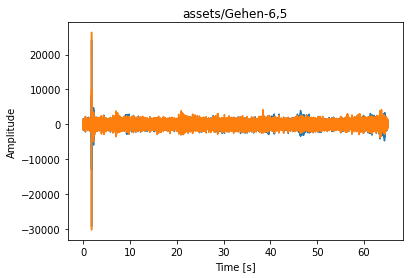

In [4]:
import matplotlib.pyplot as plt

def draw_sound_graph(mp4_file_name):
    clip = mp.VideoFileClip(mp4_file_name + ".mp4")
    clip.audio.write_audiofile(mp4_file_name + ".wav")
    data = get_data(mp4_file_name + ".wav")
    samplerate = get_samplerate(mp4_file_name + ".wav")
    duration = get_duration(mp4_file_name + ".wav")
    time_vector = get_time_vector(mp4_file_name + ".wav", duration, samplerate)

    plt.plot(time_vector,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(mp4_file_name)
    plt.show()

    if os.path.exists(mp4_file_name + ".wav"):
        os.remove(mp4_file_name + ".wav")
    else:
        print("The file does not exist")

draw_sound_graph("assets/Gehen-6,5")